# The Cournot Model

### Imports:

In [1]:
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab
from scipy import optimize
#We initiate our printing as nice equations, using the sympy package 
sm.init_printing(use_unicode=True)


## Model Description

In the model of Cournot Competition, two firms compete for the amount they produce, by simulataneously setting quantities. 

**We use the following parameters:**

1. q1 is the quantity produced by firm 1
2. q2 is the quantity produced by firm 2
3. c is the cost, which is equal for both firms 
4. a,b are parameters of the price functions of the firms
5. pi1 and pi2 are profits of firms 1 and 2 

**Preliminaries of the model:**

1. Both firms produce a homogenous product
2. There is no collusion between the firms
3. Both firms have identical costs and the same price functions 
4. The firms are economically rational

**Prices evolve according to:**

p1 = (a-b*(q1+q2))

p2 = (a-b*(q1+q2))

**Profits are derived through:**

pi1 =(p1*q1-c*q1)

pi2 = (p2*q2-c*q2)



## Solving the model:

First we define all symbols:

In [2]:
#Here we define the symbols as sympy objects. This lets us use sympy operations on them 
#The qs are the quantyties that firm 1 and firm 2 produces

q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
#c is the production cost, this is assumed to be equal 
c = sm.symbols('c')

# a is a parameter used to calculate the prices. 
a = sm.symbols('a')
#b is a substiotion parameter, that describes the substitution elasticity between form 1 and firm 2's product. If b = 1 
# the product are perfect substitues, anything under 1 and above 1 is non-perfect. 
b = sm.symbols("b")

#Pi are the profits for the two firms
pi1 = sm.symbols('pi_1')
pi2 = sm.symbols('pi_2')

We use the price and profit equations, to then derive the first order conditions wrt. the quantity produced by the respective firm:

In [3]:
#Here we define the price and and the profit functions

#the prices are defined as the parameter a minus the substitution parameter times the quantyties from firm 1 and 2 
p1 = (a-b*(q1+q2))

p2 = (a-b*(q1+q2))


# The profit of the firm is given by the prices times quantity, minus the cost times the quantity
pi1 =(p1*q1-c*q1)

pi2 = (p2*q2-c*q2)

In [4]:
# int order to finde the Cournot equilibrium, we need to begin by differentiating the two profit functions
#Here we use the sympy fuctionality to differentiante the profit function with regards to the qunatity
foc1=sm.diff(pi1,q1)
foc1

In [5]:
#same as above, for firm 2
foc2=sm.diff(pi2,q2)
foc2

Setting first order conditions to 0 and solving for the respective firms produced quantitiy (q1 and q2), give us the optimal qunatities the two firms should produce, given the other firms output (reaction functions).

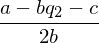

In [152]:
#Here we again use the sympy functionality to set the function = 0 by using sm.Eq, and thereafter solving it for the quantity
sol1= sm.solve(sm.Eq(foc1,0),q1)[0]
sol1

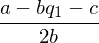

In [7]:
#Same as above for firm 2
sol2= sm.solve(sm.Eq(foc2,0),q2)[0]
sol2

The Cournot equlibrium is achieved, when substituting one firm's reaction function into the other firm's reaction function. This equlibrium constitutes the optimal quantity that both firms should produce, given that the other firm is rational and is aiming to produce the profit maximizing amount. 

We first substitute q2 in firm 1's fist order condition:

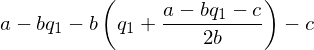

In [8]:
#Here we use sympy to substitute the optimizes quantity for firm 2, into the reaction curve for firm 1
sol1_subs = foc1.subs(q2,sol2)
sol1_subs

We then solve the equation for q1, to get the Cournot equilibrium, which is dependent on a,b and c. 

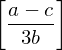

In [9]:
#Lastly we use the sympy functionality to solve the equilibrium for the quantity om q1
sol1_subs_solve = sm.solve(sm.Eq(sol1_subs,0),q1)
sol1_subs_solve

## Numeric optimization

An alternative approach to the symbolic analysis of the Cournot equilibrium, is a numeric solution. The SciPy package has multiple good tools, to optimize a function numericly. This way of solving the Cournot model is redundant when it is easy to solve it sybolicly, but the numeric optimization is good for more complex problems. 

In [10]:
#We begin by defining a demand function 

In [165]:
#Here the demand function is a liniarfunction, determined by the quantity that the two firms produce, and an substitution 
# elasticity parameter (b).

def demand(q1,q2,b=1,a=100,):
    """This function returns the demand based on the substitution parameter and the parameter a.
    
    args: 
        q1 & q2 = the quantities for form 1 and firm 2
        a = a is a paramter that determines the price. The default is 100
        b = is a parameter for the substitution elasticity between q1 and q2. Should be between 0 and 1.
            1 is perfect susbtitution
        """
    
    return a-q1-b*q2

#in order to maximixe profits, we still need a cost function. This is simply given by the cost times the quantity
def cost(q,c):
    """This function return the total costs of a firm
    
    args: 
        q = the quantity for the firm
        c = the cost of each product
        
    """
    
    cost = c*q
    return cost

In [166]:
#Based on this demand functio nwe can define a profit function. 
#This function return the profit (demand * revenue), for firm 1, given firm 2 produces a given amount of product, 
#and given equal prices
def profit(q1,q2,c,b):
    """This function takes the quantities, cost and substitution paramter and returns the profit, as the demand - the costs
    
    args: 
        q1 & q2 = the quantities of the two firms 
        c = the cost of the production of one unit, assumed equal in this function
        b = the substitution paramter
        
        """
    return demand(q1,q2,b)*q1-cost(q1,c)


In [167]:
#Armed with this profit function, it is posible to optimize the profit of firm 1, given a production of firm 2

In [171]:
def num_reaction(q2,c,b):
    """This function minimizes the profit for firm 1, given the production of firm 2, the cost and the substitution. 
        The function return -min profit, as minimazation, is preffered to maximazation. The function uses an annonymis 
        funtion, which is just minus the profit function, to minimize over. 
        
    args: 
        q2 = The quantity of firm 2 - should be between 0-100 as a is 100 as default
        c  = The cost associated with producing one unit
        b  = The substitution parameter
    """
    
    q1_opt = optimize.minimize(lambda x: -profit(x,q2,c,b), x0=1,)
                                                                 
    return q1_opt



In [180]:
#We calculate the optimal quantity for firm 1, given that firm 2 produces 50, that the cost is 1 and that they are 
# produces perfect substitutes
num_reaction(50,1,1)

      fun: -600.249999999997
 hess_inv: array([[0.50000008]])
      jac: array([7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([24.50000178])

The optimazation shows that the optimal production for firm 1 given that firm 2 produces 50, is 24,5

This numeric analysis could be extented to solving the equilibrium. However, in this project we will analyse the 
equilibrium using a symbolic approach, as it is easy to do in the case of the Counnot equilibrium

## Gettting to equilibrium

In this secton we will first define and show the reaction functions. Hereafter we will calculate Cournot equilibrum. Afterwards we will visualize the reaction curves, showing the Cournot quilibrium. 

In [219]:
#To begin we define a function for the reaction of the firms, to the other firms quantity
def reaction(q_other, a=100, b=1, cost=1,print_it=False):
    """This function calulates the quantity that a firm will produce, given the other firms production, and some parameters.
        It can also do some prettified printing
        
        args:
            q_other = the production of the other firm. should not exceed a
            a = a parameter in the price function. 
            b = a parameter determing the substitution elasticity between firm 1 and firm 2s product 
            print_it = Boolean argument. If True print the results as a sentence, and does not retun the quantity
            
        """
    #I define the quantity of firm 1 as a function of the other firm production
    quantity = (a-b*q_other - cost)/2*b
    
    #If print_it is True the function will return a readeble sentence instead of the quantity. Use this only for presentation
    if print_it:
        print("Given the other firm produces",q_other,"The firm will produce", quantity, sep=" ")
        return
    else:
        return quantity


Using the reaction function, we can now calculate the quatity that firm 1 produces, given firm 2's quantity 

In [213]:
#I define a widgets slider object, that i will use to make the reaction function interactive 
qslider = widgets.IntSlider(min=0,max=100,step=1,value=50)

#I uses the interact function on the reaction function, fixing a to 100, b and cost to 1, and print_it to True.
#This means that the only thing that can be interacted with is the qunatity of the other firm. 
widgets.interact(reaction,q_other = qslider,a=widgets.fixed(100),b=widgets.fixed(1),cost=widgets.fixed(1),print_it=widgets.fixed(True))

interactive(children=(IntSlider(value=50, description='q_other'), Output()), _dom_classes=('widget-interact',)…

<function __main__.reaction(q_other, a=100, b=1, cost=1, print_it=False)>

The reader will remember that the numerical optimazation estimated the equilibrium to 24.5, given the other firm produces 50. This is the the correct value, as can be seen in the interactive slider above.

While this is interesting, theory tells us that firms will always end in the Cournout equilibrium, given fixed costs and prices, as this maximises profits. 

The equilibrium we derived earlier as:


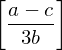

In [221]:
print("The equilibrium we derived earlier as:")
sol1_subs_solve



In [222]:
print("Which given a = 100, b= 1 and cost = 1, is:",optimal(100,1,1,text=False))

Which given a = 100, b= 1 and cost = 1, is: 33.0


We now define a function that expreses the quilibrium, so that we can calculate the equilibrium given any values of the parameters

In [223]:
def optimal(a, b, cost, text=True):
    
    """This function calculates the equilibrium that we have derived using the sympy functionality. It can also print it
        in a nice way 
        
    args: 
        a = a parameter in the price function. 
        b = a paramter determening the substitution elasticity between firm 1 and firm 2. Should be between 0 and 1
        cost = the cost of the firms of produces a unit, here assumed equal 
        text = Boolean, if True prints the equilibrium and the parameters in a readeble way, 
                if false just return equilibrium value. True by default.
    
    """
    #defining the equilibrium as derived
    equilibrium = (a-cost)/3*b
    #Then i round the equilibrium value, as we assume that the product they procuce is discrete (no half cars allowed)
    equilibrium = round(equilibrium,0)
    
    #if text is false the function return the equlibrium value
    if text==False:
        return equilibrium
    #if text i true (default), then the function does not return the equilibrium value, but instead prints a readeble line of text
    else:
        print("The Cournot equilibrium, given that","a =",a,", b =",b,"and that cost =",cost,",","is:",equilibrium)


In [226]:
#I define 3 sliders with default values. This allows us to calculate the equilibrium interactivly 
a_slider = widgets.IntSlider(min=10,max=150,step=1,value=100)
b_slider = widgets.FloatSlider(min=0,max=1,step=0.1,value=1)
cost_slider = widgets.IntSlider(min=0,max=50,step=1,value=1)

#I use the inteacti function on the optimal function, and use the slideres defined as inputs.
widgets.interact(optimal,a=a_slider,b=b_slider,cost=cost_slider)

interactive(children=(IntSlider(value=100, description='a', max=150, min=10), FloatSlider(value=1.0, descripti…

<function __main__.optimal(a, b, cost, text=True)>

## Visualization

The relation between two firms output quantity decescion, can also be shown visualy. To do this, i begin by defining a function, that creates a plot. 

In [ ]:
#Needs commenting and docstrnigs

def reaction_plot(q_other, a=100, b=1, cost=1,scatter=True, price = False):
    quantity = reaction(q_other,a, b, cost)
    
    #ax = plt.subplot()
    if scatter == True :
        plt.scatter(quantity,q_other,label = "Firm 1's reaction curve")
        plt.scatter(q_other,quantity,label = "Firm 2's reaction curve")
    else : 
        plt.plot(quantity,q_other,label = "Firm 1's reaction curve")
        plt.plot(q_other,quantity,label = "Firm 2's reaction curve")
        
    plt.xlabel("Firm 1 quantity")
    plt.ylabel("Firm 2 quantity")
    plt.legend()
    plt.xlim(0,100)
    plt.ylim(0,100)
    
    if price :
        price = a-b*(q_other+quantity)
        return price
    plt.show()
    return 

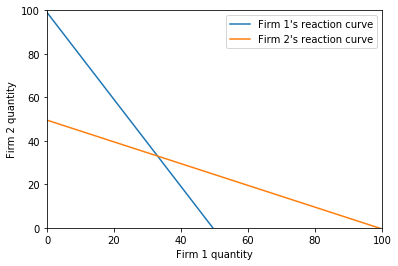

In [97]:
x = np.linspace(0, 100, 1000);
reaction_plot(q_other=x,scatter=False)

In [98]:
ai_slider = widgets.IntSlider(min=10,max=150,step=1,value=100)
bi_slider = widgets.IntSlider(min=1,max=5,step=1,value=1)
costi_slider = widgets.IntSlider(min=1,max=50,step=1,value=1)
widgets.interact(reaction_plot,q_other=widgets.fixed(x),a=ai_slider,b=bi_slider,cost=costi_slider, scatter = widgets.fixed(False), price = widgets.fixed(False))



interactive(children=(IntSlider(value=100, description='a', max=150, min=10), IntSlider(value=1, description='…

<function __main__.reaction_plot(q_other, a=100, b=1, cost=1, scatter=True, price=False)>

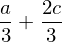

In [99]:
#Here we put in the price and the symbollic estimation of it
price_1 = p1.subs([(q1,sol1_subs_solve[0]), (q2, sol1_subs_solve[0])])
price_1


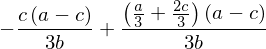

In [100]:
pi = pi1.subs([(p1,price_1), (q1,sol1_subs_solve[0])])
pi

In [101]:
def price_eq(q_other, a = 100, b = 1, cost = 1):
    q = reaction(q_other, a, b, cost)
    
    price = a-b*(q_other+q)
    
    opt_q = optimal(a, b, cost, text = False)
    if price > 0:
        print("The price in the Cournot equilibrium is",price)
        print("The quantity that the two firms will produce in the Cournor equilibrium is",opt_q)
    else:
        print("Price can't be negative")
    

In [102]:
qp_slider = widgets.IntSlider(min=10,max=101,step=1,value=50)
ap_slider = widgets.IntSlider(min=10,max=100,step=1,value=100)
bp_slider = widgets.IntSlider(min=1,max=5,step=1,value=1)
costp_slider = widgets.IntSlider(min=1,max=50,step=1,value=1)
widgets.interact(price_eq,q_other=qp_slider, a = ap_slider, b= bp_slider, cost = costp_slider)

interactive(children=(IntSlider(value=50, description='q_other', max=101, min=10), IntSlider(value=100, descri…

<function __main__.price_eq(q_other, a=100, b=1, cost=1)>